In [1]:
import os
import time
import random
import sys  
import matplotlib.pyplot as plt
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
import numpy as np
import torch.nn as nn
from albumentations.pytorch import ToTensorV2
from torch.optim import Adam
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import classification_report
import torchvision.transforms as T

In [2]:
ROOT_DIR = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "../"))
if ROOT_DIR not in sys.path:
    sys.path.insert(0, ROOT_DIR)
print(ROOT_DIR)

from src.model.paddleocr import OCRModule

/root/upstageailab-cv-classification-cv_7


In [3]:
def show_images_with_preds(img_list, n_cols=4):
    n_imgs = len(img_list)
    n_rows = (n_imgs + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 4, n_rows * 4))

    for i, img_str in enumerate(img_list):
        img = Image.open(img_str)

        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [4]:
data_path = "./../../data/train"
img_list = np.array(os.listdir(data_path))

imgs = img_list[np.random.choice(len(img_list), size=8, replace=False)]
img_paths = [os.path.join(data_path, img) for img in imgs]



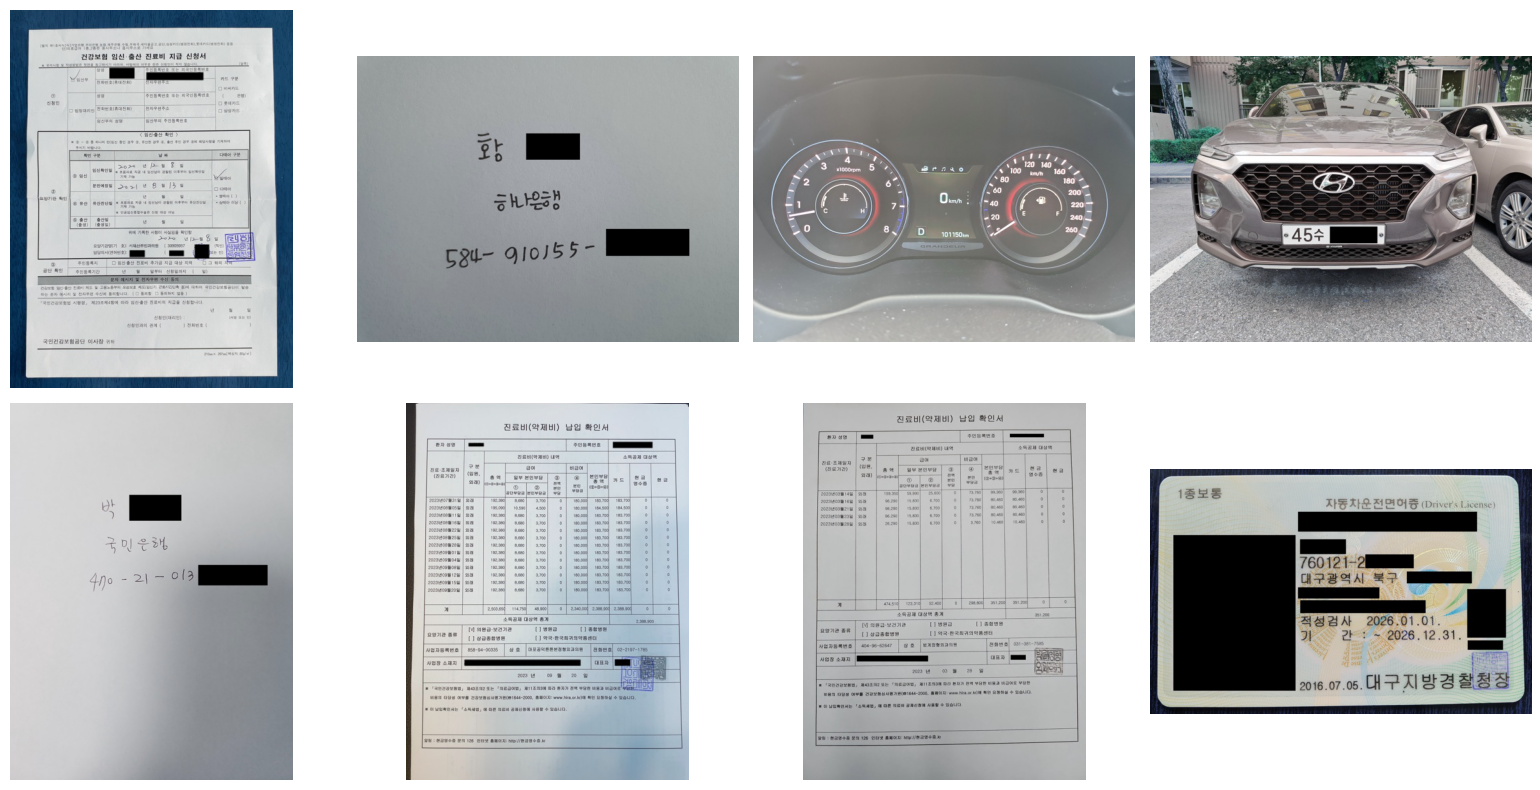

In [5]:
show_images_with_preds(img_paths)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = T.Compose([
    T.Resize((456, 456)),
    T.ToTensor(),
])

img_tensors = [transform(Image.open(img_path)) for img_path in img_paths]
img_tensor_batch = torch.stack(img_tensors).to(device)

In [7]:
import paddle
print(paddle.__version__)              # 2.6.1
print(paddle.is_compiled_with_cuda()) # True


/opt/conda/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:715: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


3.1.0
True


In [8]:
OCR = OCRModule()


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /data/ephemeral/home/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in /data/ephemeral/home/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /data/ephemeral/home/.paddlex/official_models.


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /data/ephemeral/home/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('korean_PP-OCRv5_mobile_rec', None)
Using official model (korean_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in /data/ephemeral/home/.paddlex/official_models.


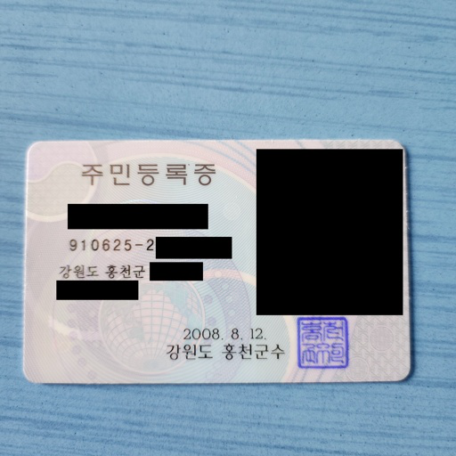

In [9]:
tensor_to_pil = T.ToPILImage()

pil_img = tensor_to_pil(img_tensor_batch[2])

display(pil_img)

In [ ]:
result = OCR.run_ocr(img_tensor_batch)

['건강보험 임신출산 진료비 지급 신청서',
 ')',
 '카트 구분',
 ' ',
 '신청인',
 '성)',
 '()',
 ' ',
 '.',
 '(>',
 '구',
 'V',
 '다해아 구',
 '입신확전일',
 '2020',
 '4μ2',
 '3',
 '①읽힘',
 'P14',
 '②',
 '분만에일',
 '221',
 '8',
 '113',
 '대아',
 '오입기한 확',
 '∞유',
 '류산전단법',
 'E',
 'E',
 ' ()',
 '8',
 '(',
 '8',
 '년',
 'W',
 '위베기획한 시청이사실임을확인항',
 '2020',
 '년12',
 '8',
 '2y',
 ')',
 '요기관영[기',
 '시신인',
 '공답확인',
 '∞',
 '민지',
 '입기상',
 '기간',
 '3',
 '자시일자 수',
 '년',
 'W',
 '신청입지',
 'W)',
 '  ',
 '2',
 'e  e   ',
 '()',
 '년',
 '신과의 경제(',
 '1전',
 '국민건감보험공단 이사장 귀하']

In [16]:
display(result[7]['rec_texts'])

['1종보통',
 "자동차운전면허증(Driver's License)",
 '760121-2',
 '대구광역시 북구',
 '적성검사',
 '2026.01.01.',
 '기',
 '간:~',
 '2026.12.31.',
 '.대구지방경찰청장',
 '2016.07.05.']

In [17]:
from keybert import KeyBERT

model = KeyBERT('distilbert-base-nli-mean-tokens')

In [12]:
doc = ' '.join(result[0]['rec_texts'])

keywords = model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None, top_n=5)
print(keywords)

[('929016 주민등록증', 0.9139), ('주민등록증', 0.7989), ('12 929016', 0.603), ('2008 12', 0.5866), ('929016', 0.5257)]
